# Web3: Scraping Web Data

## Warmup 0

In [ ]:
import requests

# The documentation is only 1 page!
# https://beautiful-soup-4.readthedocs.io/en/latest/
from bs4 import BeautifulSoup

## Warmup 1: HTML table and hyperlinks
In order to scrape web pages, you need to know the HTML syntax for tables and hyperlinks.

#### Warmup 1a: Add another row.

<table>
  <tr>
    <th>University</th>
    <th>Department</th>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://www.cs.wisc.edu/">Computer Sciences</a></td>
  </tr>
  <tr>
    <td>UC Berkeley</td>
    <td><a href = "https://eecs.berkeley.edu/">Electrical Engineering and Computer Sciences</a></td>
    </tr>
</table>

## Warmup 1b: Does indentation matter?

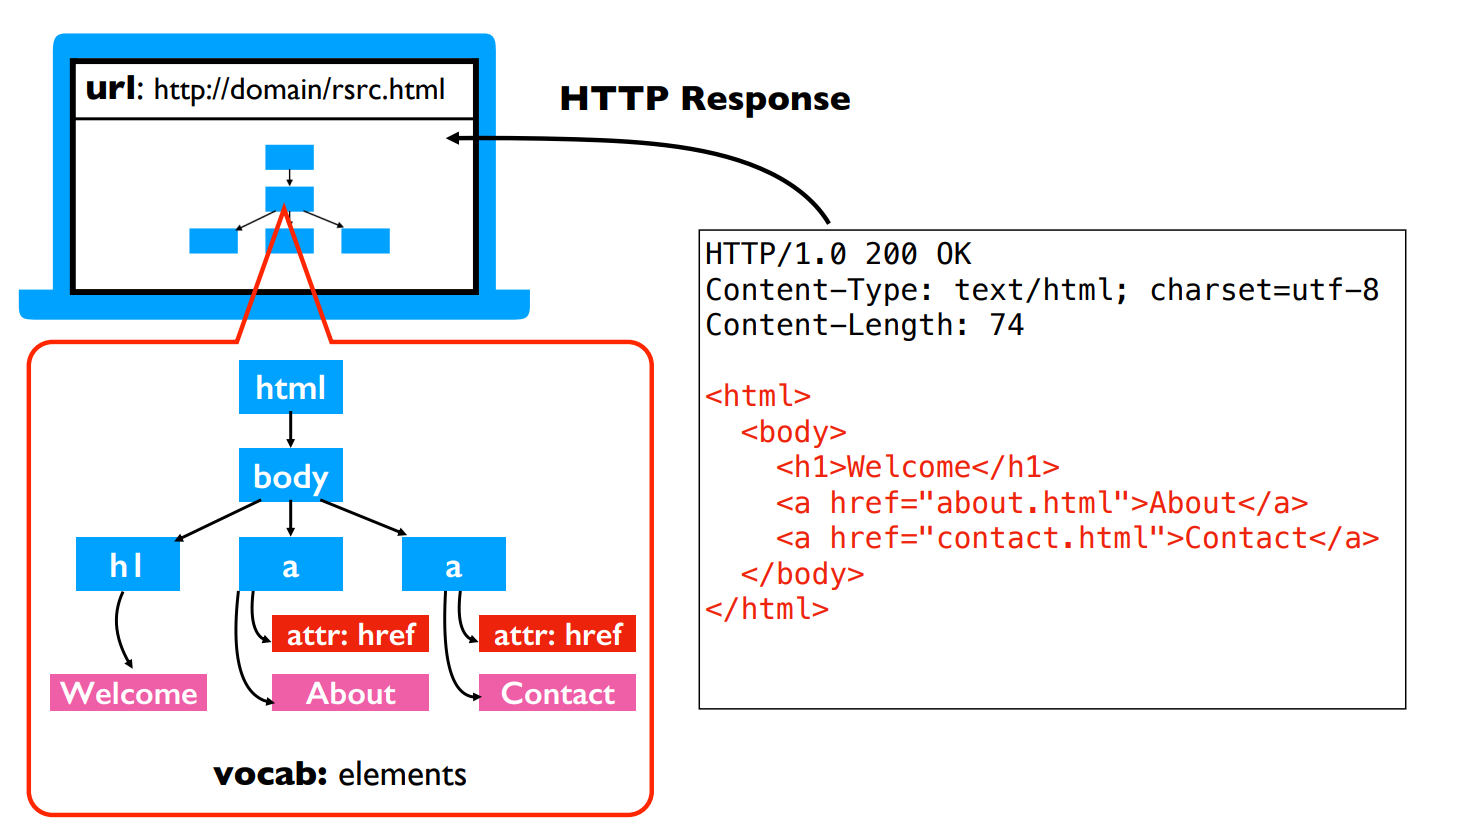

## Warmup 1c: Consider the following HTML...

`<a href="https://www.google.com/"><b>Google</b> It</a>`

* **DOM** stands for *DOCUMENT OBJECT MODEL*
* An HTML page looks like a *TREE*
* `<b>Google</b>` is an *ELEMENT NODE*
* `href` is an *ATTRIBUTE*
* `"It"` is *TEXT* (also a *child*)

<a href="https://www.google.com/"><b>Google</b> It</a>

## Warmup 2: GET Syllabus Information

Read the contents of the page: `https://cs220.cs.wisc.edu/s24/syllabus.html`

In [ ]:
# write your code here

## Warmup 2a: Find all sentences that contain "title"

In [ ]:
# write your code here

## Warmup 2b: Extract title tag's value

In [ ]:
# write your code here

### Learning Objectives:

- Using the Document Object Model of web pages
    - describe the 3 things a DOM element may contain, and give examples of each
    - given an html string, identify the correct DOM tree of elements
- Create BeautifulSoup objects from an html string and use prettify to display
- Use the BeautifulSoup methods `find` and `find_all` to find particular elements by their tag
- Inspect a BeautufulSoup element to determine the contents of a web page using `get_text()`, children, and attrs
- Use BeautifulSoup to scrape a live web site. 

### Document Object Model

In order to render a HTML page, most web browsers use a tree structure called Document Object Model (DOM) to represent the HTML page as a hierarchy of elements.

<div>
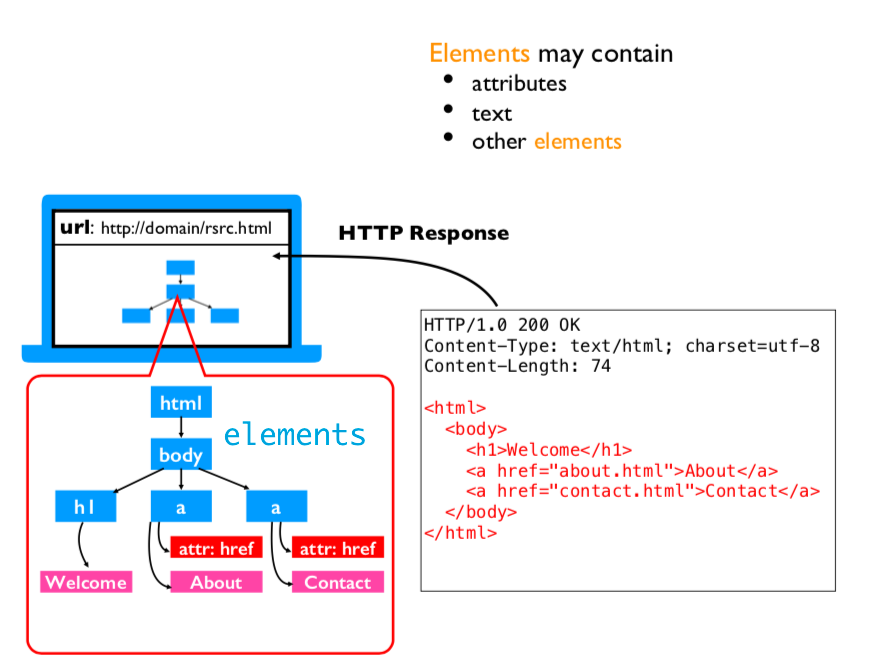
</div>

### Take a look at the HTML in the below cell.

<b>To Do List</b>
<ul>
    <li>Eat Healthy</li>
    <li><a href="https://docs.python.org/3/library/time.html#time.sleep">Sleep</a> <b>More</b></li>
    <li>Exercise</li>
</ul>

### BeautifulSoup constructor
- takes html and parses it
- Syntax: `BeautifulSoup(<html_string>, "html.parser")`
- Second argument specifies what kind of parsing we want done

In [ ]:
html_string = "<b>To Do List</b><ul><li>Eat Healthy</li><li><a href=\"https://docs.python.org/3/library/time.html#time.sleep\">Sleep</a> <b>More</b></li><li>Exercise</li></ul>"
bs_obj = BeautifulSoup(html_string, "html.parser") 

type(bs_obj)

## BeautifulSoup operations
- `prettify()`        returns a formatted representation of the raw HTML

### A  BeautifulSoup object can be searched for elements using:
- `find("")`         returns the first element matching the tag string, None otherwise
- `find_all("")`     returns an iterable of all matching elements (HTML 'tags'), empty iterable otherwise

### Beautiful Soup Elements can be inspected by using:
- `get_text()`     returns the text associated with this element, if applicable; does not return the child elements associated with that element
- `.children`      all children of this element (can be converted into a list)
- `.attrs`          the atribute associated with that element / tag.

#### `prettify` returns a formatted representation of the raw HTML

In [ ]:
print(bs_obj.prettify())

#### `find` returns the first HTML 'tag' matching the string `"b"`

In [ ]:
element = bs_obj.find("b")
print(type(element))
element

#### `get_text` extracts the text within an element

In [ ]:
text = element.get_text()
print(text, type(text))

#### `find` returns `None` if it cannot find that element

In [ ]:
assert bs_obj.find("ul") != None # assert that this html string has a <ul> tag

In [ ]:
assert bs_obj.find("a") == None # assert that this does not have an <a> tag

#### `find_all` returns an iterable of all matching elements (HTML 'tags')

In [ ]:
element_list = bs_obj.find_all("b")
element_list

In [ ]:
print(type(element_list), element_list[0])

#### We can use a `for` loop to loop through this 'list'

In [ ]:
for element in element_list:
    print(element.get_text())

#### Unlike `find`, `find_all` returns an empty 'list', when there are no matching elements.

In [ ]:
print(bs_obj.find_all("Sleep")) # only searches for elements, not text

In [ ]:
print(bs_obj.find("Sleep")) # if not present returns None 

## Exercise 1: Find all list elements in `bs_obj`

In [ ]:
# write your code here

## Exercise 2: Find all bold list items in the 2nd list element

In [ ]:
# write your code here

#### DOM trees are hierarchical. You can use `.children` on any element to gets its children.

In [ ]:
element = bs_obj.find("ul")
print(element.prettify())
children_list = list(element.children)
children_list

#### You can also loop through this list of children

In [ ]:
for child in children_list:
    print(child.get_text())

#### Notice that `get_text()` only returns the actual text and not the HTML formatting.

In [ ]:
for li_item in bs_obj.find("ul").children:
    bold_item = li_item.find("b")
    if bold_item != None:
        print(bold_item.get_text())

## Exercise 3: Get the title of the Syllabus Page using Beautiful Soup

Recall that the url is: `https://cs220.cs.wisc.edu/s24/syllabus.html`

In [ ]:
# write your code here

## Exercise 4: Use Beautiful Soup to get all the headings (h1 and h2 elements) from the Beautiful Soup documentation

The url is: `https://beautiful-soup-4.readthedocs.io/en/latest/`

In [ ]:
# write your code here

#### New syntax: You can use `"""some really long string"""` to split a string across multiple lines.

In [ ]:
html_string = """
<table>
  <tr>
    <th>University</th>
    <th>Department</th>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://www.cs.wisc.edu/">Computer Sciences</a></td>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://stat.wisc.edu/">Statistics</a></td>
  </tr>
   <tr>
    <td>UW-Madison</td>
    <td><a href = "https://cdis.wisc.edu/">CDIS</a></td>
  </tr>
  <tr>
    <td>UC Berkeley</td>
    <td><a href = "https://eecs.berkeley.edu/">Electrical Engineering and Computer Sciences</a></td>
    </tr>
</table>
"""

## Example 1: Get all the table headers

In [ ]:
bs_obj = BeautifulSoup(html_string, "html.parser")
th_elements = bs_obj.find_all("th") # works only if there is one table in that whole HTML

for th in th_elements:
    print(th.get_text())

## Example 2: Get the first anchor element

In [ ]:
first_anchor = bs_obj.find("a")
first_anchor.get_text()

#### You can get the attributes associated with an element using `.attrs` on that element object. Return value will be a `dict` mapping each attribute to its value.

In [ ]:
first_anchor_attributes = first_anchor.attrs
first_anchor_attributes

In [ ]:
print(type(first_anchor_attributes))
first_anchor_attributes["href"]

## Exercise 5: Extract hyperlinks for each department and populat edepartment name and link into a dict where the key is the department name, and the value is the URL

In [ ]:
# write your code here

## Example 3: Parsing `small_movies` html table to create `small_movies.json`

### Step 1: Read `small_movies.html` content into a variable

In [ ]:
f = open("small_movies.html", encoding='utf-8')
small_movies_str = f.read()
f.close()
small_movies_str

### Step 2: Initialize BeautifulSoup object instance

In [ ]:
bs_obj = BeautifulSoup(small_movies_str, "html.parser")
bs_obj

### Step 3: Find table element

In [ ]:
table = bs_obj.find("table") # works only when you have exactly 1 table
table

### Step 4: Find all `th` tags, to parse the table header

In [ ]:
header = [th.get_text() for th in table.find_all('th')]
header

### Step 5: Scrape second row, convert data to appropriate types, and populate data into a row dictionary
- **Year**, **Runtime**: `int` conversion
- **Revenue**: `format_revenue` conversion
- **Rating**: `float` conversion
- **Cast**, **Genre**: `list` conversion

In [ ]:
def format_revenue(revenue):
    if type(revenue) == float: # need this in here if we run code multiple times
        return revenue
    elif revenue[-1] == 'M': # some have an "M" at the end
        return float(revenue[:-1]) * 1e6
    else:                    # otherwise, assume millions.
        return float(revenue) * 1e6

In [ ]:
movie = {}

tr_elements = table.find_all('tr')
tr = tr_elements[1]
td_elements = tr.find_all('td')
for idx in range(len(td_elements)):
    td = td_elements[idx]
    val = td.get_text()
    if header[idx] in ["Year", "Runtime"]:
        movie[header[idx]] = int(val)
    elif header[idx] == "Revenue":
        revenue = format_revenue(val)
        movie[header[idx]] = revenue
    elif header[idx] == "Rating":
        movie[header[idx]] = float(val)
    elif header[idx] in ["Cast", "Genre"]:
        movie[header[idx]] = [elmt.strip() for elmt in val.split(",")]
    else:
        movie[header[idx]] = val
    
movie

### Step 6: Scrape all rows, convert data to appropriate types, and populate data into a row dictionary and append row dictionaries into a list
- **Year**, **Runtime**: `int` conversion
- **Revenue**: `format_revenue` conversion
- **Rating**: `float` conversion
- **Cast**, **Genre**: `list` conversion

In [ ]:
movies_data = []

tr_elements = table.find_all('tr')
for tr in tr_elements[1:]: # Skip first row (header row)
    td_elements = tr.find_all('td')
    movie = {}
    for idx in range(len(td_elements)):
        td = td_elements[idx]
        val = td.get_text()
        if header[idx] in ["Year", "Runtime"]:
            movie[header[idx]] = int(val)
        elif header[idx] == "Revenue":
            revenue = format_revenue(val)
            movie[header[idx]] = revenue
        elif header[idx] == "Rating":
            movie[header[idx]] = float(val)
        elif header[idx] in ["Cast", "Genre"]:
            movie[header[idx]] = [elmt.strip() for elmt in val.split(",")]
        else:
            movie[header[idx]] = val
    movies_data.append(movie)

movies_data

### Step 7: convert steps 1 through 6 into a function and use that function to parse `full_movies.html` file.

In [ ]:
def parse_html(html_file):
    f = open(html_file, encoding='utf-8')
    movies_str = f.read()
    f.close()

    bs_obj = BeautifulSoup(movies_str, "html.parser")
    
    table = bs_obj.find("table") # works only when you have exactly 1 table
    header = [th.get_text() for th in table.find_all('th')]

    movies_data = []

    tr_elements = table.find_all('tr')
    for tr in tr_elements[1:]: # Skip first row (header row)
        td_elements = tr.find_all('td')
        movie = {}
        for idx in range(len(td_elements)):
            td = td_elements[idx]
            val = td.get_text()
            if header[idx] in ["Year", "Runtime"]:
                movie[header[idx]] = int(val)
            elif header[idx] == "Revenue":
                revenue = format_revenue(val)
                movie[header[idx]] = revenue
            elif header[idx] == "Rating":
                movie[header[idx]] = float(val)
            elif header[idx] in ["Cast", "Genre"]:
                movie[header[idx]] = [elmt.strip() for elmt in val.split(",")]
            else:
                movie[header[idx]] = val
        movies_data.append(movie)
    
    return movies_data

In [ ]:
full_movies_data = parse_html("full_movies.html")
full_movies_data

### Step 8: use `parse_html` to parse `"full_movies.html"` and write the contents into `"full_movies.json"`

In [ ]:
import json

f = open("full_movies.json", 'w', encoding='utf-8')
json.dump(full_movies_data, f)
f.close()